In [1]:
import pandas as pd
import numpy as np
import chess_analyzer as chan

import seaborn as sns
import matplotlib.pyplot as plt

# best view options
pd.set_option('display.max_rows', 45000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.max_colwidth', 5000)


In [2]:
max_eval = 500

In [3]:
df = chan.analyze_pgn_evaluations('games/rosolimo_2025-11_game_145613281378.pgn')
print("Data frame with {ln} rows".format(ln=len(df)))
df.sample(3)


Data frame with 102 rows


,move_number,full_move,player,move_san,evaluation,evaluation_pawns,eval_change,move_type,game_phase,white_time_remaining,black_time_remaining,white_time_used,black_time_used,time_used,white_material,black_material,material_balance,white_pawns,black_pawns,is_same_material_kind,white_isolated_pawns,black_isolated_pawns,white_doubled_pawns,black_doubled_pawns,white_passed_pawns,black_passed_pawns,white_center_control,black_center_control,white_castled,black_castled,white_captures,black_captures,white_promotions,black_promotions,is_capture,is_promotion
67,67,34,White,Kg2,-631,-6.31,0.20,normal,endgame,48.2,161.0,199.8,85.0,2.9,7,9,-2,2,4,False,0,0,0,0,0,2,0,4,False,False,10,12,0,0,False,False
52,52,26,Black,Ra3,-224,-2.24,-0.42,normal,endgame,87.2,163.7,144.8,68.3,4.0,9,10,-1,4,5,False,1,0,0,0,0,0,2,2,False,False,9,10,0,0,False,False
47,47,24,White,Rac1,-252,-2.52,0.09,normal,endgame,87.1,166.0,140.9,60.0,52.7,15,15,0,5,5,True,2,0,0,0,1,0,3,2,False,False,8,8,0,0,False,False


In [4]:
df[0:8]

,move_number,full_move,player,move_san,evaluation,evaluation_pawns,eval_change,move_type,game_phase,white_time_remaining,black_time_remaining,white_time_used,black_time_used,time_used,white_material,black_material,material_balance,white_pawns,black_pawns,is_same_material_kind,white_isolated_pawns,black_isolated_pawns,white_doubled_pawns,black_doubled_pawns,white_passed_pawns,black_passed_pawns,white_center_control,black_center_control,white_castled,black_castled,white_captures,black_captures,white_promotions,black_promotions,is_capture,is_promotion
0,0,0,Start,NaN,35,0.35,0.00,normal,opening,180.0,180.0,0.0,0.0,NaN,39,39,0,8,8,True,0,0,0,0,0,0,0,0,False,False,0,0,0,0,False,False
1,1,1,White,d4,25,0.25,-0.10,normal,opening,180.2,180.0,1.8,0.0,1.8,39,39,0,8,8,True,0,0,0,0,0,0,2,0,False,False,0,0,0,0,False,False
2,2,1,Black,Nf6,25,0.25,-0.00,normal,opening,180.2,180.6,1.8,1.4,1.4,39,39,0,8,8,True,0,0,0,0,0,0,2,1,False,False,0,0,0,0,False,False
3,3,2,White,c4,25,0.25,0.00,normal,opening,180.9,180.6,3.1,1.4,1.3,39,39,0,8,8,True,0,0,0,0,0,0,3,1,False,False,0,0,0,0,False,False
4,4,2,Black,g6,52,0.52,-0.27,normal,opening,180.9,181.5,3.1,2.5,1.1,39,39,0,8,8,True,0,0,0,0,0,0,3,1,False,False,0,0,0,0,False,False
5,5,3,White,Nc3,32,0.32,-0.20,normal,opening,181.6,181.5,4.4,2.5,1.3,39,39,0,8,8,True,0,0,0,0,0,0,4,1,False,False,0,0,0,0,False,False
6,6,3,Black,d5,30,0.30,0.02,normal,opening,181.6,181.5,4.4,4.5,2.0,39,39,0,8,8,True,0,0,0,0,0,0,4,3,False,False,0,0,0,0,False,False
7,7,4,White,e3,4,0.04,-0.26,normal,opening,177.5,181.5,10.5,4.5,6.1,39,39,0,8,8,True,0,0,0,0,0,0,5,3,False,False,0,0,0,0,False,False


In [5]:
df = chan.start_analyze(
    user_name='rosolimo',
    date_range=('2025-11-11', '2025-11-13'),
    is_verbose=True,
    is_api=0,
    path='games'
)
print("Data frame with {ln} rows".format(ln=len(df)))
df.sample(3)


Data frame with 2092 rows


,move_number,full_move,player,move_san,evaluation,evaluation_pawns,eval_change,move_type,game_phase,white_time_remaining,black_time_remaining,white_time_used,black_time_used,time_used,white_material,black_material,material_balance,white_pawns,black_pawns,is_same_material_kind,white_isolated_pawns,black_isolated_pawns,white_doubled_pawns,black_doubled_pawns,white_passed_pawns,black_passed_pawns,white_center_control,black_center_control,white_castled,black_castled,white_captures,black_captures,white_promotions,black_promotions,is_capture,is_promotion,game_id,url,white_username,white_rating,white_result,white_points,black_username,black_rating,black_result,black_points,time_control,time_class,rules,end_time,end_timestamp,rated
2032,51,26,White,Rb2,-69,-0.69,-1.48,mistake,middlegame,101.3,141.6,130.7,88.4,14.4,17,16,1,7,5,False,1,1,0,0,0,0,3,1,True,False,7,6,0,0,False,False,145452784472,https://www.chess.com/game/live/145452784472,Rosolimo,1671,resigned,0.0,Solver2024,1616,win,1.0,180+2,blitz,chess,2025-11-13 10:41:07,1763019667,True
447,31,16,White,bxc3,-151,-1.51,-0.52,inaccuracy,middlegame,162.5,183.4,49.5,26.6,4.4,31,31,0,6,6,True,2,0,0,0,0,0,3,3,True,True,4,4,0,0,True,False,145371026560,https://www.chess.com/game/live/145371026560,Rosolimo,1688,resigned,0.0,PositionalForce,1705,win,1.0,180+2,blitz,chess,2025-11-11 09:23:10,1762842190,True
500,37,19,White,Qg5,-128,-1.28,0.03,normal,middlegame,138.1,126.3,79.9,89.7,8.2,32,31,1,7,6,False,0,0,0,0,0,0,3,6,True,True,4,3,0,0,False,False,145371087366,https://www.chess.com/game/live/145371087366,alexyagov14,1606,win,1.0,Rosolimo,1678,resigned,0.0,180+2,blitz,chess,2025-11-11 09:29:46,1762842586,True


In [25]:
df = chan.start_analyze(
    user_name='rosolimo',
    date_range=('2025-10-01', '2025-11-01'),
    is_verbose=True,
    is_api=1,
    path='games'
)
print("Data frame with {ln} rows".format(ln=len(df)))
df.sample(3)


STEP 1: FETCHING GAMES FROM CHESS.COM
Fetching games for rosolimo from 2025-10...
URL: https://api.chess.com/pub/player/rosolimo/games/2025/10
Found 141 games
  [1/141] Saved: rosolimo_2025-10_game_143769264212.pgn (ID: 143769264212)
  [2/141] Saved: rosolimo_2025-10_game_143769392550.pgn (ID: 143769392550)
  [3/141] Saved: rosolimo_2025-10_game_143769564852.pgn (ID: 143769564852)
  [4/141] Saved: rosolimo_2025-10_game_143831344754.pgn (ID: 143831344754)
  [5/141] Saved: rosolimo_2025-10_game_143831612194.pgn (ID: 143831612194)
  [6/141] Saved: rosolimo_2025-10_game_143831826690.pgn (ID: 143831826690)
  [7/141] Saved: rosolimo_2025-10_game_143841709756.pgn (ID: 143841709756)
  [8/141] Saved: rosolimo_2025-10_game_143841864190.pgn (ID: 143841864190)
  [9/141] Saved: rosolimo_2025-10_game_143842009406.pgn (ID: 143842009406)
  [10/141] Saved: rosolimo_2025-10_game_143842075348.pgn (ID: 143842075348)
  [11/141] Saved: rosolimo_2025-10_game_143842271178.pgn (ID: 143842271178)
  [12/141] Sav

,move_number,full_move,player,move_san,evaluation,evaluation_pawns,eval_change,move_type,game_phase,white_time_remaining,black_time_remaining,white_time_used,black_time_used,time_used,white_material,black_material,material_balance,white_pawns,black_pawns,is_same_material_kind,white_isolated_pawns,black_isolated_pawns,white_doubled_pawns,black_doubled_pawns,white_passed_pawns,black_passed_pawns,white_center_control,black_center_control,white_castled,black_castled,white_captures,black_captures,white_promotions,black_promotions,is_capture,is_promotion,game_id,url,white_username,white_rating,white_result,white_points,black_username,black_rating,black_result,black_points,time_control,time_class,rules,end_time,end_timestamp,rated
102420,45,23,White,Rf3,144,1.44,-0.04,normal,middlegame,152.9,156.2,73.1,67.8,6.2,29,29,0,7,7,False,0,3,0,1,0,0,4,4,False,True,4,4,0,0,False,False,144026367352,https://www.chess.com/game/live/144026367352,Rosolimo,1695,resigned,0.0,chessbati,1691,win,1.0,180+2,blitz,chess,2025-10-08 00:53:24,1759874004,True
138916,43,22,White,Rd1,-785,-7.85,-0.98,inaccuracy,middlegame,47.7,118.3,176.3,103.7,11.8,22,22,0,6,6,True,3,1,1,0,0,0,4,4,True,True,5,5,0,0,False,False,143996247962,https://www.chess.com/game/live/143996247962,NotMamuno,1678,win,1.0,Rosolimo,1722,resigned,0.0,180+2,blitz,chess,2025-10-07 08:57:12,1759816632,True
150630,25,13,White,exd4,-247,-2.47,0.05,normal,middlegame,162.3,153.7,43.7,50.3,1.5,35,35,0,7,7,True,0,0,0,0,0,0,3,3,True,False,2,2,0,0,True,False,143939953990,https://www.chess.com/game/live/143939953990,hamedhaji,1701,checkmated,0.0,Rosolimo,1719,win,1.0,180+2,blitz,chess,2025-10-05 20:48:44,1759686524,True


In [26]:
print("Data frame with {ln} rows".format(ln=len(df)))

Data frame with 390014 rows


In [27]:
df.sample(3)

,move_number,full_move,player,move_san,evaluation,evaluation_pawns,eval_change,move_type,game_phase,white_time_remaining,black_time_remaining,white_time_used,black_time_used,time_used,white_material,black_material,material_balance,white_pawns,black_pawns,is_same_material_kind,white_isolated_pawns,black_isolated_pawns,white_doubled_pawns,black_doubled_pawns,white_passed_pawns,black_passed_pawns,white_center_control,black_center_control,white_castled,black_castled,white_captures,black_captures,white_promotions,black_promotions,is_capture,is_promotion,game_id,url,white_username,white_rating,white_result,white_points,black_username,black_rating,black_result,black_points,time_control,time_class,rules,end_time,end_timestamp,rated
297563,52,26,Black,Be7,53,0.53,-0.52,inaccuracy,middlegame,78.7,62.1,153.3,169.9,9.9,20,21,-1,4,5,False,1,2,0,0,1,2,2,2,True,True,6,7,0,0,False,False,143853774412,https://www.chess.com/game/live/143853774412,omidd7,1756,win,1.0,Rosolimo,1690,checkmated,0.0,180+2,blitz,chess,2025-10-03 16:21:00,1759497660,True
276100,42,21,Black,f6,80,0.80,0.13,normal,middlegame,124.5,162.3,97.5,59.7,5.1,33,33,0,5,5,True,0,0,0,0,0,0,3,5,True,True,4,4,0,0,False,False,144099229266,https://www.chess.com/game/live/144099229266,Rosolimo,1692,resigned,0.0,javierhache,1694,win,1.0,180+2,blitz,chess,2025-10-09 21:29:44,1760034584,True
123225,31,16,White,Bf3,-811,-8.11,-0.32,normal,middlegame,98.7,138.1,113.3,71.9,10.8,28,29,-1,6,7,False,2,0,0,1,0,0,3,2,True,True,4,5,0,0,False,False,144948845678,https://www.chess.com/game/live/144948845678,MisterSakamoto,1777,resigned,0.0,Rosolimo,1773,win,1.0,180+2,blitz,chess,2025-10-31 14:42:58,1761910978,True


In [28]:
game_accur_df = df[
    (df['white_username'] == 'Rosolimo')&
    (df['player'] == 'White')
    ].groupby(['player', 'white_username', 'black_username', 'game_id']).agg(
    games = ('game_id', 'nunique'),
    eval = ('evaluation', 'sum'),
    eval_change = ('eval_change', 'sum'),
).reset_index().sort_values('games', ascending=False)
game_accur_df['accur'] = (500 + game_accur_df['eval_change']) / 500
game_accur_df



,player,white_username,black_username,game_id,games,eval,eval_change,accur
0,White,Rosolimo,26martinvul,145339967052,1,10049,-4.95,0.99010
1,White,Rosolimo,Adyad,144949205190,1,-791461,-7096.21,-13.19242
2,White,Rosolimo,Amalie15,145706782726,1,941,-9.76,0.98048
3,White,Rosolimo,Anaslotfy7778,145255813036,1,17669,-12.58,0.97484
4,White,Rosolimo,AndreuStudent,144945475858,1,-311395,-628.37,-0.25674
5,White,Rosolimo,Andrzej1M,143769392550,1,-17019,-890.01,-0.78002
6,White,Rosolimo,Anjolichess,144145752608,1,-2605550,-13965.81,-26.93162
7,White,Rosolimo,Arya_Abhinav25,144685208104,1,120280,-1665.32,-2.33064
8,White,Rosolimo,Ashish910,144768906740,1,194401,-592.72,-0.18544
9,White,Rosolimo,Azimi99,145331450146,1,-2606,-34.27,0.93146


In [29]:
def make_user_df(df):
    white_df = df[df['player'] == 'White'].copy()
    white_df['color'] ='White'
    white_df['player'] = white_df['white_username']
    white_df['opponent'] = white_df['black_username']

    white_df['result'] = white_df['white_result']
    white_df['opponent_result'] = white_df['black_result']


    white_df['points'] = white_df['white_points']
    white_df['opponent_points'] = white_df['black_points']
    
    white_df['rating'] = white_df['white_rating']
    white_df['opponent_rating'] = white_df['black_rating']

    white_df['time_remaining'] = white_df['white_time_remaining']
    white_df['opponent_time_remaining'] = white_df['black_time_remaining']

    white_df['time_used'] = white_df['white_time_used']
    white_df['opponent_time_used'] = white_df['black_time_used']

    white_df['material'] = white_df['white_material']
    white_df['opponent_material'] = white_df['black_material']

    white_df['pawns'] = white_df['white_pawns']
    white_df['opponent_pawns'] = white_df['black_pawns']

    white_df['isolated_pawns'] = white_df['white_isolated_pawns']
    white_df['opponent_isolated_pawns'] = white_df['black_isolated_pawns']

    white_df['doubled_pawns'] = white_df['white_doubled_pawns']
    white_df['opponent_doubled_pawns'] = white_df['black_doubled_pawns']

    white_df['passed_pawns'] = white_df['white_passed_pawns']
    white_df['opponent_passed_pawns'] = white_df['black_passed_pawns']

    white_df['center_control'] = white_df['white_center_control']
    white_df['opponent_center_control'] = white_df['black_center_control']

    white_df['castled'] = white_df['white_castled']
    white_df['opponent_castled'] = white_df['white_castled']

    white_df['captures'] = white_df['white_captures']
    white_df['opponent_captures'] = white_df['black_captures']

    white_df['promotions'] = white_df['white_promotions']
    white_df['opponent_promotions'] = white_df['black_promotions']

    black_df = df[df['player'] == 'Black'].copy()
    black_df['color'] = 'Black'
    black_df['player'] = black_df['black_username']
    black_df['opponent'] = black_df['white_username']

    black_df['result'] = black_df['black_result']
    black_df['opponent_result'] = black_df['white_result']

    black_df['points'] = black_df['black_points']
    black_df['opponent_points'] = black_df['white_points']

    black_df['rating'] = black_df['black_rating']
    black_df['opponent_rating'] = black_df['white_rating']

    black_df['time_remaining'] = black_df['black_time_remaining']
    black_df['opponent_time_remaining'] = black_df['white_time_remaining']

    black_df['time_used'] = black_df['black_time_used']
    black_df['opponent_time_used'] = black_df['white_time_used']

    black_df['material'] = black_df['black_material']
    black_df['opponent_material'] = black_df['white_material']

    black_df['pawns'] = black_df['black_pawns']
    black_df['opponent_pawns'] = black_df['white_pawns']

    black_df['isolated_pawns'] = black_df['black_isolated_pawns']
    black_df['opponent_isolated_pawns'] = black_df['white_isolated_pawns']

    black_df['doubled_pawns'] = black_df['black_doubled_pawns']
    black_df['opponent_doubled_pawns'] = black_df['white_doubled_pawns']

    black_df['passed_pawns'] = black_df['black_passed_pawns']
    black_df['opponent_passed_pawns'] = black_df['white_passed_pawns']

    black_df['center_control'] = black_df['black_center_control']
    black_df['opponent_center_control'] = black_df['white_center_control']

    black_df['castled'] = black_df['black_castled']
    black_df['opponent_castled'] = black_df['white_castled']

    black_df['captures'] = black_df['black_captures']
    black_df['opponent_captures'] = black_df['white_captures']

    black_df['promotions'] = black_df['black_promotions']
    black_df['opponent_promotions'] = black_df['white_promotions']

    user_base_df = pd.concat([white_df, black_df])

    user_base_df['game_end_time'] = user_base_df['end_time']
    user_base_df['rating_difference'] = user_base_df['rating'] - user_base_df['opponent_rating']

    user_base_df = user_base_df[[
        'game_id',
        'game_end_time',
        'color',
        'player',
        'opponent',
        'result',
        'opponent_result',
        'points',
        'opponent_points',
        'rating',
        'opponent_rating',
        'rating_difference',
        'time_control', 'time_class', 'rules', 'rated',
        'url',
        'game_phase',
        'move_number', 'full_move', 'move_san',
        'evaluation', 'evaluation_pawns', 'eval_change',
        'move_type',
        'time_remaining',
        'opponent_time_remaining',
        'time_used',
        'opponent_time_used',
        'is_same_material_kind', 
        'material', 'opponent_material',
        'is_capture', 'is_promotion',
        'pawns',
        'opponent_pawns', 'isolated_pawns', 'opponent_isolated_pawns',
        'doubled_pawns', 'opponent_doubled_pawns', 'passed_pawns',
        'opponent_passed_pawns', 'center_control', 'opponent_center_control',
        'castled', 'opponent_castled', 'captures', 'opponent_captures',
        'promotions', 'opponent_promotions'

    ]]

    user_base_df['game_id'] = user_base_df['game_id'].astype(str)
    user_base_df['move_number'] = user_base_df['move_number'].astype(str)
    user_base_df['full_move'] = user_base_df['full_move'].astype(str)
    
    return user_base_df
    

    

In [30]:
work_df =make_user_df(df)

In [31]:
work_df.sample(3)

,game_id,game_end_time,color,player,opponent,result,opponent_result,points,opponent_points,rating,opponent_rating,rating_difference,time_control,time_class,rules,rated,url,game_phase,move_number,full_move,move_san,evaluation,evaluation_pawns,eval_change,move_type,time_remaining,opponent_time_remaining,time_used,opponent_time_used,is_same_material_kind,material,opponent_material,is_capture,is_promotion,pawns,opponent_pawns,isolated_pawns,opponent_isolated_pawns,doubled_pawns,opponent_doubled_pawns,passed_pawns,opponent_passed_pawns,center_control,opponent_center_control,castled,opponent_castled,captures,opponent_captures,promotions,opponent_promotions
20262,144694091212,2025-10-25 01:14:27,Black,Kirkex24,Rosolimo,timeout,win,0.0,1.0,1672,1699,-27,180+2,blitz,chess,True,https://www.chess.com/game/live/144694091212,opening,14,7,Bg4,106,1.06,-0.26,normal,177.9,177.1,16.1,16.9,True,38,38,False,False,7,7,0,0,0,0,0,0,4,6,False,False,1,1,0,0
64807,143997941784,2025-10-07 10:07:13,Black,VincentPringle,Rosolimo,win,resigned,1.0,0.0,1713,1714,-1,180+2,blitz,chess,True,https://www.chess.com/game/live/143997941784,opening,2,1,d6,76,0.76,-0.51,inaccuracy,180.8,181.8,1.2,0.2,True,39,39,False,False,8,8,0,0,0,0,0,0,1,2,False,False,0,0,0,0
377707,144664329622,2025-10-24 09:52:28,White,sjchess1984,Rosolimo,timeout,win,0.0,1.0,1760,1709,51,180+2,blitz,chess,True,https://www.chess.com/game/live/144664329622,middlegame,37,19,b3,-653,-6.53,-8.95,blunder,130.4,143.3,87.6,72.7,False,32,34,False,False,7,6,0,1,0,0,0,0,4,4,False,False,3,3,0,0


<Axes: xlabel='full_move'>

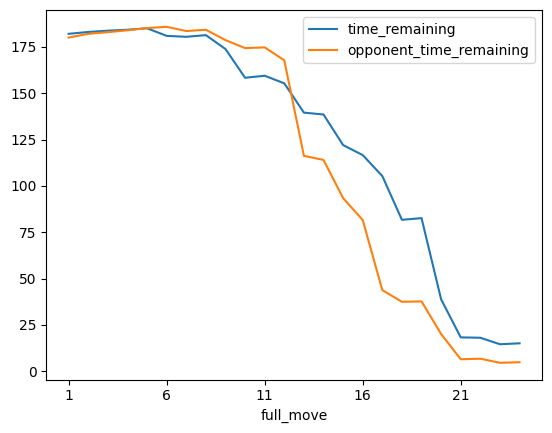

In [32]:
work_df[
    (work_df['game_id'] == '145390100692') &
    (work_df['color'] == 'White')
].set_index('full_move')[['time_remaining', 'opponent_time_remaining']].plot()

<Axes: xlabel='full_move'>

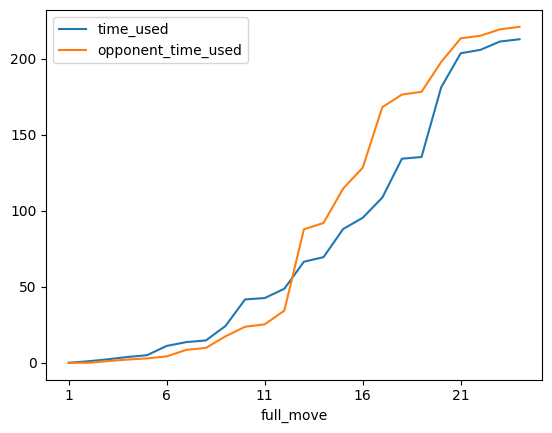

In [33]:
work_df[
    (work_df['game_id'] == '145390100692') &
    (work_df['color'] == 'White')
].set_index('full_move')[['time_used', 'opponent_time_used']].plot()

<Axes: xlabel='full_move', ylabel='evaluation'>

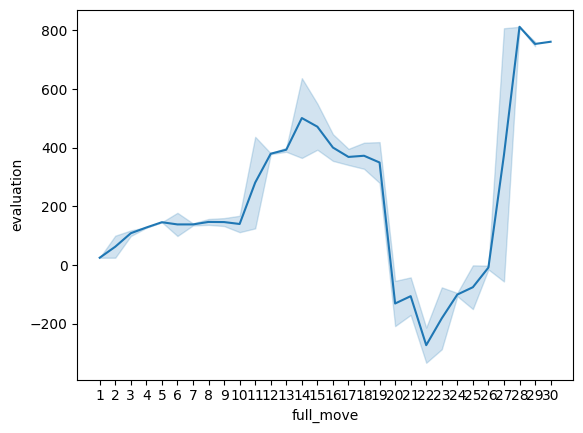

In [34]:

sns.lineplot(
    data=work_df[
        (work_df['game_id'] == '145379823080') 
    ],
    x='full_move', y='evaluation'#, hue='color'
)

In [35]:
game_accur_df = work_df.groupby(['player', 'color', 'game_id']).agg(
    games = ('game_id', 'nunique'),
    eval = ('evaluation_pawns', 'sum'),
    eval_change = ('eval_change', 'sum'),
    time_per_move = ('time_used', 'mean'),
).reset_index()
game_accur_df['accur'] = (max_eval + game_accur_df['eval_change']) / max_eval
game_accur_df.sample(7)

,player,color,game_id,games,eval,eval_change,time_per_move,accur
214,Rosolimo,Black,145706906264,1,-24.39,-11.77,18.727273,0.97646
412,mehdidastoor57,White,144798660724,1,-1356.87,-1081.90,92.431034,-1.16380
30,Cosmo-Kramer,White,144909383734,1,469.03,-366.73,33.250000,0.26654
6,AndreuStudent,Black,144945475858,1,-2715.91,-398.04,82.109375,0.20392
180,Rosolimo,Black,145145758668,1,20.88,-20.92,50.491304,0.95816
63,Kiyopon_whiteroom,Black,145411412294,1,51.13,-71.10,189.054795,0.85780
101,RoniTheCoder,White,145142498416,1,71.21,-45.61,164.329167,0.90878


In [36]:
phase_df = work_df.groupby(['player', 'color', 'game_phase']).agg(
    games = ('game_id', 'nunique'),
    eval = ('evaluation_pawns', 'sum'),
    eval_change = ('eval_change', 'sum'),
    time = ('time_used', 'sum'),
).reset_index()


In [37]:
phase_df[phase_df['player'] == 'Rosolimo']

,player,color,game_phase,games,eval,eval_change,time
253,Rosolimo,Black,endgame,80,116653.74,-78761.29,7225754.7
254,Rosolimo,Black,middlegame,112,32077.77,-53151.45,3533303.1
255,Rosolimo,Black,opening,114,6863.02,-6373.13,236160.4
256,Rosolimo,White,endgame,71,-40179.17,-77188.00,6085641.4
257,Rosolimo,White,middlegame,113,-25748.90,-71507.27,4096695.6
258,Rosolimo,White,opening,114,9989.54,-7515.42,219158.9


In [38]:
moves_df = work_df.groupby(['player', 'move_type']).agg(
    games = ('game_id', 'nunique'),
    moves = ('move_number', 'count'),
    eval = ('evaluation_pawns', 'sum'),
    eval_change = ('eval_change', 'sum'),
    time = ('time_used', 'sum'),
).reset_index()
moves_df['eval_per_move'] = moves_df['eval'] / moves_df['moves']
moves_df['eval_change_per_move'] = moves_df['eval_change'] / moves_df['moves']
moves_df['time_per_move'] = moves_df['time'] / moves_df['moves']

In [39]:
moves_df[moves_df['player'] == 'Rosolimo']

,player,move_type,games,moves,eval,eval_change,time,eval_per_move,eval_change_per_move,time_per_move
405,Rosolimo,blunder,213,22702,5938.93,-257572.82,3273403.2,0.261604,-11.345821,144.190080
406,Rosolimo,good,123,5663,-17566.08,23722.44,933045.6,-3.101904,4.189023,164.761716
407,Rosolimo,inaccuracy,226,26688,14853.27,-18919.33,2681079.1,0.556552,-0.708908,100.460098
408,Rosolimo,mistake,212,21671,11922.83,-30853.99,2513817.3,0.550174,-1.423746,115.999137
409,Rosolimo,normal,228,116113,84507.05,-10872.86,11995368.9,0.727800,-0.093640,103.307717


In [67]:
tst_df = work_df[
    (work_df['game_id'] == '145613281378') &
    (work_df['color'] == 'White')
]
tst_df.sample(7)


,game_id,game_end_time,color,player,opponent,result,opponent_result,points,opponent_points,rating,opponent_rating,rating_difference,time_control,time_class,rules,rated,url,game_phase,move_number,full_move,move_san,evaluation,evaluation_pawns,eval_change,move_type,time_remaining,opponent_time_remaining,time_used,opponent_time_used,is_same_material_kind,material,opponent_material,is_capture,is_promotion,pawns,opponent_pawns,isolated_pawns,opponent_isolated_pawns,doubled_pawns,opponent_doubled_pawns,passed_pawns,opponent_passed_pawns,center_control,opponent_center_control,castled,opponent_castled,captures,opponent_captures,promotions,opponent_promotions,positional_case
389771,145613281378,2025-11-17 12:45:34,White,Cathish,Rosolimo,repetition,repetition,0.0,0.0,1710,1702,8,180+2,blitz,chess,True,https://www.chess.com/game/live/145613281378,middlegame,25,13,b4,-70,-0.70,-0.62,inaccuracy,169.0,185.1,37.0,18.9,True,20,20,False,False,7,7,0,1,0,0,0,0,2,3,False,False,5,5,0,0,-1
389759,145613281378,2025-11-17 12:45:34,White,Cathish,Rosolimo,repetition,repetition,0.0,0.0,1710,1702,8,180+2,blitz,chess,True,https://www.chess.com/game/live/145613281378,opening,13,7,Qxf3,54,0.54,-0.22,normal,177.0,180.3,17.0,11.7,False,36,36,True,False,8,8,0,0,0,0,0,0,5,3,False,False,1,1,0,0,0
389769,145613281378,2025-11-17 12:45:34,White,Cathish,Rosolimo,repetition,repetition,0.0,0.0,1710,1702,8,180+2,blitz,chess,True,https://www.chess.com/game/live/145613281378,middlegame,23,12,Bxc6+,-29,-0.29,-0.58,inaccuracy,168.3,184.0,35.7,18.0,False,23,20,True,False,7,7,0,0,0,0,0,0,3,2,False,False,5,4,0,0,-1
389839,145613281378,2025-11-17 12:45:34,White,Cathish,Rosolimo,repetition,repetition,0.0,0.0,1710,1702,8,180+2,blitz,chess,True,https://www.chess.com/game/live/145613281378,endgame,93,47,Kf5,0,0.00,0.00,normal,19.2,127.4,254.8,144.6,False,5,6,False,False,0,1,0,1,0,0,0,1,1,1,False,False,13,14,0,0,0
389755,145613281378,2025-11-17 12:45:34,White,Cathish,Rosolimo,repetition,repetition,0.0,0.0,1710,1702,8,180+2,blitz,chess,True,https://www.chess.com/game/live/145613281378,opening,9,5,Nf3,30,0.30,0.19,normal,177.4,179.8,12.6,8.2,True,39,39,False,False,8,8,0,0,0,0,0,0,6,3,False,False,0,0,0,0,0
389817,145613281378,2025-11-17 12:45:34,White,Cathish,Rosolimo,repetition,repetition,0.0,0.0,1710,1702,8,180+2,blitz,chess,True,https://www.chess.com/game/live/145613281378,endgame,71,36,gxh5,-660,-6.60,-0.01,normal,45.1,162.5,206.9,87.5,False,6,8,True,False,1,3,1,1,0,0,1,3,0,3,False,False,11,13,0,0,-4
389781,145613281378,2025-11-17 12:45:34,White,Cathish,Rosolimo,repetition,repetition,0.0,0.0,1710,1702,8,180+2,blitz,chess,True,https://www.chess.com/game/live/145613281378,middlegame,35,18,exd4,-103,-1.03,0.25,normal,159.4,183.1,56.6,30.9,True,18,18,True,False,5,5,2,0,0,0,1,0,2,3,False,False,7,7,0,0,-1


In [41]:
bins = [-np.inf, -4,-3,-2, 0, 1, 2, 3, 4, np.inf]
labels = ['-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4']
work_df['positional_case'] = pd.cut(
    work_df['evaluation_pawns'], 
    bins=bins, 
    labels=labels, 
    right=False, 
    include_lowest=True
    )

In [46]:
work_df.sample(7)

,game_id,game_end_time,color,player,opponent,result,opponent_result,points,opponent_points,rating,opponent_rating,rating_difference,time_control,time_class,rules,rated,url,game_phase,move_number,full_move,move_san,evaluation,evaluation_pawns,eval_change,move_type,time_remaining,opponent_time_remaining,time_used,opponent_time_used,is_same_material_kind,material,opponent_material,is_capture,is_promotion,pawns,opponent_pawns,isolated_pawns,opponent_isolated_pawns,doubled_pawns,opponent_doubled_pawns,passed_pawns,opponent_passed_pawns,center_control,opponent_center_control,castled,opponent_castled,captures,opponent_captures,promotions,opponent_promotions,positional_case
111323,143769564852,2025-10-01 12:34:58,White,pawnpower85,Rosolimo,repetition,repetition,0.0,0.0,1690,1700,-10,180+2,blitz,chess,True,https://www.chess.com/game/live/143769564852,opening,1,1,e4,27,0.27,-0.08,normal,181.8,180.0,0.2,0.0,True,39,39,False,False,8,8,0,0,0,0,0,0,1,0,False,False,0,0,0,0,0
237176,143939953990,2025-10-05 20:48:44,Black,Rosolimo,hamedhaji,win,checkmated,1.0,0.0,1719,1701,18,180+2,blitz,chess,True,https://www.chess.com/game/live/143939953990,endgame,86,43,Bg3+,-1207,-12.07,-55.77,blunder,44.6,4.5,221.4,261.5,False,16,7,False,False,4,2,0,0,0,0,2,0,3,1,True,False,12,9,0,0,-4
208100,144807892844,2025-10-27 23:44:04,Black,Rosolimo,mpadres63,checkmated,win,0.0,1.0,1766,1788,-22,180+2,blitz,chess,True,https://www.chess.com/game/live/144807892844,middlegame,46,23,Ng6,508,5.08,-0.26,normal,101.8,46.5,124.2,179.5,False,26,27,False,False,6,4,0,1,0,0,0,0,4,3,True,True,6,5,0,0,+4
52160,143962623574,2025-10-06 13:10:42,Black,efgen35,Rosolimo,insufficient,insufficient,0.0,0.0,1714,1718,-4,180+2,blitz,chess,True,https://www.chess.com/game/live/143962623574,middlegame,40,20,Nc5,219,2.19,-0.19,normal,136.5,168.0,83.5,52.0,False,17,18,False,False,6,7,0,0,0,0,0,0,1,4,True,True,5,6,0,0,+2
238060,144015897512,2025-10-07 19:39:40,Black,Rosolimo,coolhotguy_2024,win,timeout,1.0,0.0,1722,1712,10,180+2,blitz,chess,True,https://www.chess.com/game/live/144015897512,endgame,72,36,Rf8,-300,-3.00,-3.54,blunder,126.1,10.5,125.9,241.5,False,19,16,False,False,5,4,0,1,1,0,0,0,1,3,True,False,9,8,0,0,-2
220505,144821745158,2025-10-28 10:10:59,Black,BrainMath,Rosolimo,resigned,win,0.0,1.0,1799,1775,24,180+2,blitz,chess,True,https://www.chess.com/game/live/144821745158,middlegame,32,16,Nxc3,12,0.12,-1.19,mistake,142.0,157.0,70.0,55.0,False,34,31,True,False,6,6,1,0,0,0,0,0,5,3,True,True,4,3,0,0,0
136482,143841709756,2025-10-03 09:06:27,Black,Rosolimo,quicocho,resigned,win,0.0,1.0,1687,1832,-145,180+2,blitz,chess,True,https://www.chess.com/game/live/143841709756,opening,8,4,Nf6,15,0.15,-0.02,normal,184.2,184.2,3.8,3.8,True,38,38,False,False,7,7,0,0,0,0,0,0,3,3,False,False,1,1,0,0,0


In [43]:
situation_df = work_df.groupby(['player', 'color', 'positional_case']).agg(
    games = ('game_id', 'nunique'),
    moves = ('move_number', 'count'),
    points = ('points', 'sum'),
).reset_index()
situation_df['points_per_game'] = situation_df['points'] / situation_df['games']

/tmp/ipykernel_335007/171125079.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  situation_df = work_df.groupby(['player', 'color', 'positional_case']).agg(


In [44]:
situation_df.sample(7)

,player,color,positional_case,games,moves,points,points_per_game
193,Ashish910,White,0,0,0,0.0,NaN
2108,adelriahi,Black,-2,1,248,248.0,248.0
2966,kubrickup,White,+1,1,124,124.0,124.0
1570,PremV80,Black,0,0,0,0.0,NaN
462,Cathish,White,-1,1,9,0.0,0.0
2207,baple1,White,-2,0,0,0.0,NaN
1189,LanjinS,Black,-3,0,0,0.0,NaN


In [45]:
situation_df[situation_df['player'] == 'Rosolimo']

,player,color,positional_case,games,moves,points,points_per_game
1656,Rosolimo,Black,-4,56,12045,11063.0,197.553571
1657,Rosolimo,Black,-3,38,2080,1221.0,32.131579
1658,Rosolimo,Black,-2,41,3228,2151.0,52.463415
1659,Rosolimo,Black,-1,102,19076,9806.0,96.137255
1660,Rosolimo,Black,0,113,31780,13297.0,117.672566
1661,Rosolimo,Black,+1,80,5899,1822.0,22.775000
1662,Rosolimo,Black,+2,60,2808,1155.0,19.250000
1663,Rosolimo,Black,+3,46,2925,903.0,19.630435
1664,Rosolimo,Black,+4,76,18889,2662.0,35.026316
1665,Rosolimo,White,-4,67,13627,1845.0,27.537313


In [47]:
work_df.sample(3)

,game_id,game_end_time,color,player,opponent,result,opponent_result,points,opponent_points,rating,opponent_rating,rating_difference,time_control,time_class,rules,rated,url,game_phase,move_number,full_move,move_san,evaluation,evaluation_pawns,eval_change,move_type,time_remaining,opponent_time_remaining,time_used,opponent_time_used,is_same_material_kind,material,opponent_material,is_capture,is_promotion,pawns,opponent_pawns,isolated_pawns,opponent_isolated_pawns,doubled_pawns,opponent_doubled_pawns,passed_pawns,opponent_passed_pawns,center_control,opponent_center_control,castled,opponent_castled,captures,opponent_captures,promotions,opponent_promotions,positional_case
123045,144929215942,2025-10-31 00:20:52,White,Rosolimo,Xenos525,resigned,win,0.0,1.0,1773,1695,78,180+2,blitz,chess,True,https://www.chess.com/game/live/144929215942,middlegame,23,12,Bb4,208,2.08,-0.17,normal,179.3,183.3,24.7,18.7,False,31,31,False,False,6,6,0,1,0,0,0,0,2,2,False,False,4,4,0,0,+2
82845,144769028832,2025-10-26 23:56:56,White,IcyRadiation,Rosolimo,resigned,win,0.0,1.0,1707,1713,-6,180+2,blitz,chess,True,https://www.chess.com/game/live/144769028832,middlegame,41,21,Bxg6,-280,-2.80,-2.19,blunder,144.7,122.0,77.3,98.0,False,19,20,True,False,6,4,0,2,1,0,0,0,5,2,True,True,7,6,0,0,-2
192757,144670628936,2025-10-24 13:47:45,Black,Rosolimo,Guillekings,resigned,win,0.0,1.0,1693,1690,3,180+2,blitz,chess,True,https://www.chess.com/game/live/144670628936,middlegame,48,24,Bxd4,397,3.97,-3.51,blunder,84.8,86.3,143.2,141.7,False,26,25,True,False,6,5,0,0,0,0,0,0,5,3,True,True,6,5,0,0,+3


In [130]:
work_df['material_balance'] = work_df['material'] - work_df['opponent_material']

In [131]:
tst_df = work_df[
    (work_df['game_id'] == '144769028832')
].drop_duplicates()


In [132]:
len(tst_df.drop_duplicates())

84

In [166]:
white_game_stat = work_df[work_df['color'] == 'White'].groupby([
    'game_id', 'color'
    ]).agg(
    moves_total = ('move_number', 'count'),
    eval_avg = ('evaluation_pawns', 'mean'),
    eval_change_total = ('eval_change', 'sum'),
    time_used_total = ('time_used', 'max'),
    material_balance_max = ('material_balance', 'max'),
    material_balance_min = ('material_balance', 'min'),
    normal_moves = ('move_type', lambda x: (x == 'normal').sum()),
    inaccuracy_moves = ('move_type', lambda x: (x == 'inaccuracy').sum()),
    blunder_moves = ('move_type', lambda x: (x == 'blunder').sum()),
    mistake_moves = ('move_type', lambda x: (x == 'mistake').sum()),
    good_moves = ('move_type', lambda x: (x == 'good').sum()),
    eval_minus_4 = ('evaluation_pawns', lambda x: (x <= -4).sum().astype(bool).astype(int)),
    eval_minus_3 = ('evaluation_pawns', lambda x: (x <= -3).sum().astype(bool).astype(int)),
    eval_minus_2 = ('evaluation_pawns', lambda x: (x <= -2).sum().astype(bool).astype(int)),
    eval_minus_1 = ('evaluation_pawns', lambda x: (x <= -1).sum().astype(bool).astype(int)),
    eval_plus_1 = ('evaluation_pawns', lambda x: (x >= 1).sum().astype(bool).astype(int)),
    eval_plus_2 = ('evaluation_pawns', lambda x: (x >= 2).sum().astype(bool).astype(int)),
    eval_plus_3 = ('evaluation_pawns', lambda x: (x >= 3).sum().astype(bool).astype(int)),
    eval_plus_4 = ('evaluation_pawns', lambda x: (x >= 4).sum().astype(bool).astype(int)),
        ).reset_index()


black_game_stat = work_df[work_df['color'] == 'Black'].groupby([
    'game_id', 'color'
    ]).agg(
    moves_total = ('move_number', 'count'),
    eval_avg = ('evaluation_pawns', 'mean'),
    eval_change_total = ('eval_change', 'sum'),
    time_used_total = ('time_used', 'max'),
    material_balance_max = ('material_balance', 'max'),
    material_balance_min = ('material_balance', 'min'),
    normal_moves = ('move_type', lambda x: (x == 'normal').sum()),
    inaccuracy_moves = ('move_type', lambda x: (x == 'inaccuracy').sum()),
    blunder_moves = ('move_type', lambda x: (x == 'blunder').sum()),
    mistake_moves = ('move_type', lambda x: (x == 'mistake').sum()),
    good_moves = ('move_type', lambda x: (x == 'good').sum()),
    eval_minus_4 = ('evaluation_pawns', lambda x: (x >= 4).sum().astype(bool).astype(int)),
    eval_minus_3 = ('evaluation_pawns', lambda x: (x >= 3).sum().astype(bool).astype(int)),
    eval_minus_2 = ('evaluation_pawns', lambda x: (x >= 2).sum().astype(bool).astype(int)),
    eval_minus_1 = ('evaluation_pawns', lambda x: (x >= 1).sum().astype(bool).astype(int)),
    eval_plus_1 = ('evaluation_pawns', lambda x: (x <= -1).sum().astype(bool).astype(int)),
    eval_plus_2 = ('evaluation_pawns', lambda x: (x <= -2).sum().astype(bool).astype(int)),
    eval_plus_3 = ('evaluation_pawns', lambda x: (x <= -3).sum().astype(bool).astype(int)),
    eval_plus_4 = ('evaluation_pawns', lambda x: (x <= -4).sum().astype(bool).astype(int)),
    ).reset_index()


game_stat = pd.concat([white_game_stat, black_game_stat])
game_stat['accur'] = (max_eval + game_stat['eval_change_total']) / max_eval

game_stat = game_stat.merge(
    work_df[[
        'game_id',
        'color',
        'player',
        'game_end_time',
        'result',
        'opponent_result',
        'points',
        'rating',
        'opponent_rating',
        'rating_difference',
        'time_control',
        'time_class',
        'rules',
        'rated'
    ]].drop_duplicates(),
    'left',
    on=['game_id', 'color'],
)


In [167]:
len(game_stat)

456

In [168]:
game_stat.sample(7)

,game_id,color,moves_total,eval_avg,eval_change_total,time_used_total,material_balance_max,material_balance_min,normal_moves,inaccuracy_moves,blunder_moves,mistake_moves,good_moves,eval_minus_4,eval_minus_3,eval_minus_2,eval_minus_1,eval_plus_1,eval_plus_2,eval_plus_3,eval_plus_4,accur,player,game_end_time,result,opponent_result,points,rating,opponent_rating,rating_difference,time_control,time_class,rules,rated
124,144849107566,White,527,-1.290588,-495.07,53.3,0,-3,341,93,62,31,0,1,1,1,1,0,0,0,0,0.00986,Rosolimo,2025-10-29 00:01:45,resigned,win,0.0,1774,1784,-10,180+2,blitz,chess,True
258,143956762116,Black,620,6.630000,-3173.16,100.6,3,0,403,93,62,62,0,1,1,1,1,0,0,0,0,-5.34632,Rosolimo,2025-10-06 09:03:04,resigned,win,0.0,1718,1693,25,180+2,blitz,chess,True
180,145300776976,White,56,-0.022500,-16.99,280.1,5,-1,47,5,1,3,0,0,0,0,1,0,0,0,0,0.96602,MeteorX0712,2025-11-09 14:53:22,repetition,repetition,0.0,1687,1707,-20,180+2,blitz,chess,True
188,145369058016,White,52,3.555962,-52.50,252.5,6,0,23,8,9,10,2,1,1,1,1,1,1,1,1,0.89500,fearuce,2025-11-11 07:53:57,win,resigned,1.0,1641,1689,-48,180+2,blitz,chess,True
99,144769332084,White,1240,-2.535000,-755.78,208.8,3,-7,837,248,62,93,0,1,1,1,1,0,0,0,0,-0.51156,Rosolimo,2025-10-27 00:09:55,win,timeout,1.0,1729,1705,24,180+2,blitz,chess,True
94,144748087676,White,1612,-5.638077,-4529.72,272.7,10,-2,1054,186,279,62,31,1,1,1,1,1,1,1,1,-8.05944,Krzysiekzzz,2025-10-26 13:17:59,resigned,win,0.0,1677,1704,-27,180+2,blitz,chess,True
298,144583373740,Black,1116,8.850556,-6689.18,239.7,3,-3,403,279,186,248,0,1,1,1,1,1,1,0,0,-12.37836,thenkthonk,2025-10-22 09:00:00,checkmated,win,0.0,1662,1697,-35,180+2,blitz,chess,True


In [169]:
game_stat.columns

Index(['game_id', 'color', 'moves_total', 'eval_avg', 'eval_change_total',
       'time_used_total', 'material_balance_max', 'material_balance_min',
       'normal_moves', 'inaccuracy_moves', 'blunder_moves', 'mistake_moves',
       'good_moves', 'eval_minus_4', 'eval_minus_3', 'eval_minus_2',
       'eval_minus_1', 'eval_plus_1', 'eval_plus_2', 'eval_plus_3',
       'eval_plus_4', 'accur', 'player', 'game_end_time', 'result',
       'opponent_result', 'points', 'rating', 'opponent_rating',
       'rating_difference', 'time_control', 'time_class', 'rules', 'rated'],
      dtype='object')

In [170]:
player_stat = game_stat.groupby(['player', 'color']).agg(
    games = ('game_id', 'nunique'),
    moves = ('moves_total', 'sum'),
    rating = ('rating', 'mean'),
    opponent_rating = ('opponent_rating', 'mean'),
    rating_difference = ('rating_difference', 'mean'),
    points = ('points', 'sum'),
    eval_avg = ('eval_avg', 'mean'),
    accur = ('accur', 'mean'),
    time_used_total = ('time_used_total', 'sum'),
    blunder_moves = ('blunder_moves', 'sum'),
    mistake_moves = ('mistake_moves', 'sum'),
    normal_moves = ('normal_moves', 'sum'),
    inaccuracy_moves = ('inaccuracy_moves', 'sum'),
    good_moves = ('good_moves', 'sum'),
    eval_minus_4 = ('eval_minus_4', 'sum'),
    eval_minus_3 = ('eval_minus_3', 'sum'),
    eval_minus_2 = ('eval_minus_2', 'sum'),
    eval_minus_1 = ('eval_minus_1', 'sum'),
    eval_plus_1 = ('eval_plus_1', 'sum'),
    eval_plus_2 = ('eval_plus_2', 'sum'),
    eval_plus_3 = ('eval_plus_3', 'sum'),
    eval_plus_4 = ('eval_plus_4', 'sum'),
).reset_index()


player_stat['win_rate'] = player_stat['points'] / player_stat['games']
player_stat['time_per_move'] = player_stat['time_used_total'] / player_stat['moves']
player_stat['blunder_moves'] = player_stat['blunder_moves'] / player_stat['moves']
player_stat['mistake_moves'] = player_stat['mistake_moves'] / player_stat['moves']
player_stat['normal_moves'] = player_stat['normal_moves'] / player_stat['moves']
player_stat['inaccuracy_moves'] = player_stat['inaccuracy_moves'] / player_stat['moves']
player_stat['good_moves'] = player_stat['good_moves'] / player_stat['moves']
player_stat['eval_minus_4'] = player_stat['eval_minus_4'] / player_stat['games']
player_stat['eval_minus_3'] = player_stat['eval_minus_3'] / player_stat['games']
player_stat['eval_minus_2'] = player_stat['eval_minus_2'] / player_stat['games']
player_stat['eval_minus_1'] = player_stat['eval_minus_1'] / player_stat['games']
player_stat['eval_plus_1'] = player_stat['eval_plus_1'] / player_stat['games']
player_stat['eval_plus_2'] = player_stat['eval_plus_2'] / player_stat['games']
player_stat['eval_plus_3'] = player_stat['eval_plus_3'] / player_stat['games']
player_stat['eval_plus_4'] = player_stat['eval_plus_4'] / player_stat['games']




In [171]:
player_stat[player_stat['player'] == 'Rosolimo'].T

,96,97
player,Rosolimo,Rosolimo
color,Black,White
games,114,114
moves,98730,94107
rating,1710.035088,1710.605263
opponent_rating,1704.061404,1696.552632
rating_difference,5.973684,14.052632
points,47.0,57.0
eval_avg,1.670754,-0.496428
accur,-1.426068,-1.740538
